In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
import matplotlib.pyplot as plt

In [144]:
embedding_dim = 64
vocab_size = 10000
oov_tok = "<OOV>"
truncating_method = "post"
max_seq_len = 33
batch_size = 32
LEARNING_RATE = 7e-3
EPOCHS = 30

In [145]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

In [146]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [147]:
text, labels = df.loc[:,"text"], df.loc[:,"target"]

In [148]:
sentences = text.to_numpy()
labels = labels.to_numpy()

In [149]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(sentences)

In [150]:
sequences = tokenizer.texts_to_sequences(sentences)

In [151]:
X_train = pad_sequences(sequences, maxlen = max_seq_len)

In [152]:
X_train.shape

(7613, 33)

In [153]:
Y_train = labels.reshape(-1, 1)

In [154]:
Y_train.shape

(7613, 1)

In [155]:
model = tf.keras.Sequential([
    Embedding(vocab_size + 1, embedding_dim, input_shape = (33,)),
    Bidirectional(LSTM(32, return_sequences = True)),
    Bidirectional(LSTM(32)),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 33, 64)         │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 33, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,177 (2.66 MB)

 Trainable params: 698,177 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
X_train.dtype

dtype('int32')

In [158]:
Y_train.dtype

dtype('int64')

In [159]:
opt = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)

In [160]:
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'f1_score'])

In [173]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch / 30))

In [174]:
tf.keras.backend.clear_session()

In [175]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = EPOCHS, callbacks = [lr_schedule])

Epoch 1/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9670 - f1_score: 0.6081 - loss: 0.0886 - learning_rate: 0.0010
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9753 - f1_score: 0.6011 - loss: 0.0589 - learning_rate: 0.0011
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9758 - f1_score: 0.5965 - loss: 0.0571 - learning_rate: 0.0012
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9828 - f1_score: 0.5966 - loss: 0.0416 - learning_rate: 0.0013
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9812 - f1_score: 0.6038 - loss: 0.0425 - learning_rate: 0.0014
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9804 - f1_score: 0.5959 - loss: 0.0387 - learning_rate: 0.0015
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9836 - f1_score: 0.6028 - loss: 0.0378 - learning_rate: 0.0016
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9852 - f1_score: 0.6000

(0.001, 0.1, 0.0, 0.2)

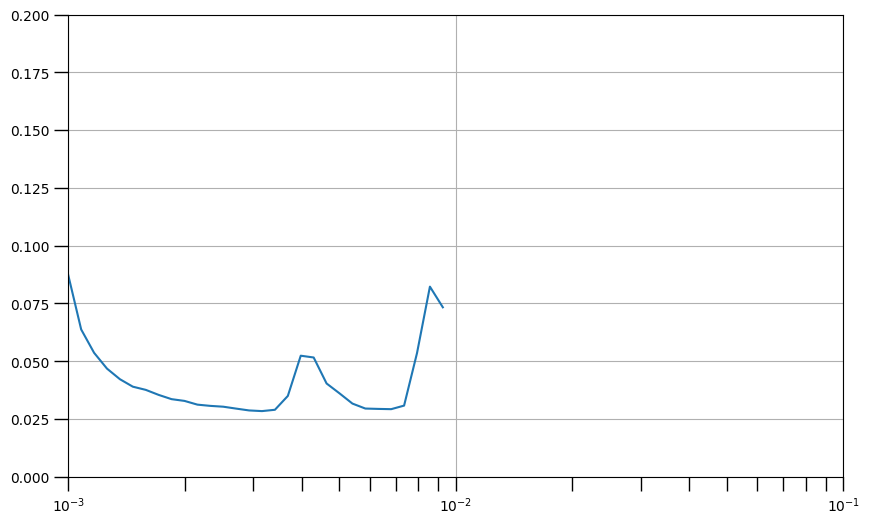

In [177]:
lrs = 1e-3 * (10 ** (np.arange(30) / 30))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-3, 1e-1, 0, 0.2])

In [178]:
model.evaluate(X_train, Y_train)

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9862 - f1_score: 0.5740 - loss: 0.0371


[0.05262885242700577, 0.9787206053733826, 0.6010656952857971]

In [179]:
opt = tf.keras.optimizers.Adam(learning_rate = 6e-3)

In [180]:
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'f1_score'])

In [181]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs = EPOCHS)

Epoch 1/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9747 - f1_score: 0.6048 - loss: 0.0597
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9859 - f1_score: 0.6115 - loss: 0.0367
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9836 - f1_score: 0.6242 - loss: 0.0361
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9864 - f1_score: 0.6413 - loss: 0.0307
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9859 - f1_score: 0.6559 - loss: 0.0266
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9848 - f1_score: 0.6680 - loss: 0.0311
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9873 - f1_score: 0.6564 - loss: 0.0285
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9870 - f1_score: 0.6399 - loss: 0.0289
Epoch 9/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9848 - f1_score: 0.6462 - loss: 0.0323
Epoch 10/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11

In [182]:
model.evaluate(X_train, Y_train)

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9925 - f1_score: 0.7467 - loss: 0.0147


[0.024282611906528473, 0.9879153966903687, 0.7281833291053772]

In [183]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [184]:
ids = df.loc[:, "id"]

In [185]:
test_text = df.loc[:, "text"]

In [186]:
sequences = tokenizer.texts_to_sequences(test_text)

In [187]:
X_test = pad_sequences(sequences, maxlen = max_seq_len, truncating = truncating_method)

In [188]:
predictions = model.predict(X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [189]:
predictions = predictions.reshape(predictions.shape[0],)

In [190]:
predictions

array([0.99994445, 0.99999595, 1.        , ..., 0.99999976, 1.        ,
       1.        ], dtype=float32)

In [191]:
predictions = (predictions >= 0.5)

In [192]:
predictions = predictions.astype('int64')

In [193]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [194]:
output = pd.DataFrame({'id': ids, 'target': predictions})
output.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
